# Taller 5 - Morfología matemática

# Punto 4 - Etiquetado de objetos

**Integrantes - Grupo 9**

Santiago Tinjacá Roncancio

### 4.0 Inicialización

In [32]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from skimage.morphology import dilation, erosion, opening, closing, rectangle
from scipy.ndimage import morphological_gradient
from skimage.filters import sobel_h, sobel_v, sobel
from skimage import exposure
from skimage.measure import label



### 4.1 Cargado y visualización de la imagen

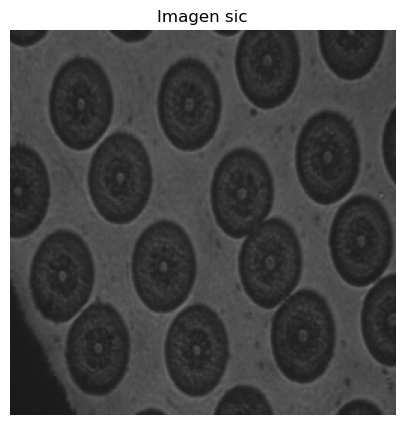

In [4]:
ruta_sic = './images/sic.png'
img_sic = cv2.imread(ruta_sic, cv2.IMREAD_GRAYSCALE)

fig, ax = plt.subplots(figsize=(10,5))
ax.imshow(img_sic, cmap='gray', vmin=0, vmax=255)
ax.set_title('Imagen sic')
ax.axis('off')
plt.show()

### 4.2 Umbralizado de la imagen para ceparar las celulas del fondo.



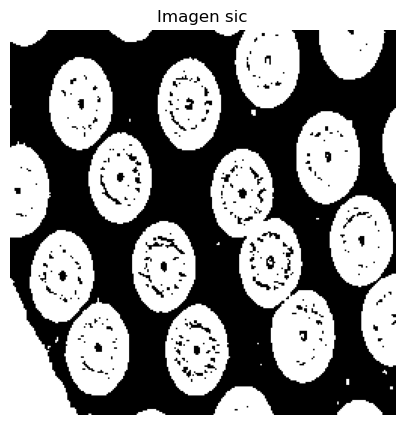

In [22]:
img_morpho_bin = cv2.threshold(img_sic, 55, 255, cv2.THRESH_BINARY)[1]
img_morpho_bin = cv2.bitwise_not(img_morpho_bin)

fig, ax = plt.subplots(figsize=(10,5))
ax.imshow(img_morpho_bin, cmap='gray', vmin=0, vmax=255)
ax.set_title('Imagen sic')
ax.axis('off')
plt.show()

### 4.3 Dilataciones para rellenar los huecos de las celulas usando una mascara en cruz 3x3.

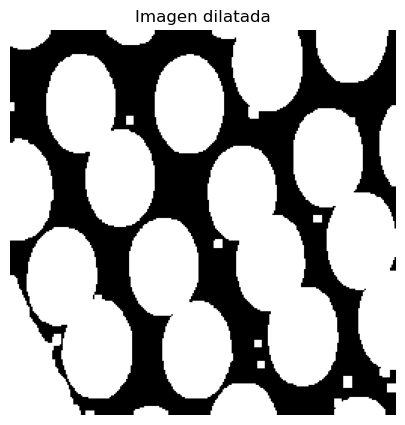

In [23]:
def create_cross_mask(size):
    mask = np.full((size, size), np.nan)
    center = size // 2
    mask[center, :] = 1
    mask[:, center] = 1
    return mask

cross_mask = create_cross_mask(3)
dilated_image = img_morpho_bin
for i in range(2):
    dilated_image = dilation(dilated_image, footprint=cross_mask)

fig, ax = plt.subplots(figsize=(10,5))
ax.imshow(dilated_image, cmap='gray', vmin=0, vmax=255)
ax.set_title('Imagen dilatada')
ax.axis('off')
plt.show()



### 4.4 Cambio de mascaras, remplazando por mascaras lineales

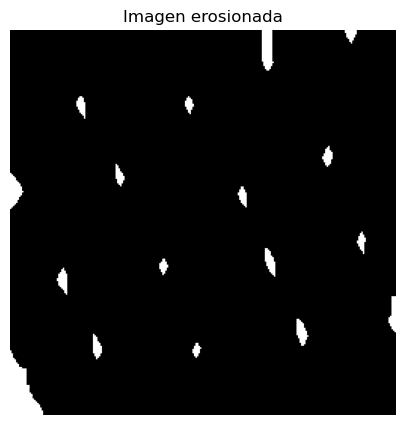

In [30]:
mask_dd = np.full((3, 3), np.nan)
mask_dd[0,2] = 1
mask_dd[1,1] = 1
mask_dd[2,0] = 1

mask_di = np.full((3, 3), np.nan)
mask_di[0,0] = 1
mask_di[1,1] = 1
mask_di[2,2] = 1

erosion_img = dilated_image
for _ in range(10):
    erosion_img = erosion(erosion_dd, footprint=mask_dd)

erosion_img = erosion_img
for _ in range(6):
    erosion_img = erosion(erosion_img, footprint=mask_di)

fig, ax = plt.subplots(figsize=(10,5))
ax.imshow(erosion_img, cmap='gray', vmin=0, vmax=255)
ax.set_title('Imagen erosionada')
ax.axis('off')
plt.show()

### Etiquetado y visualización del resultado

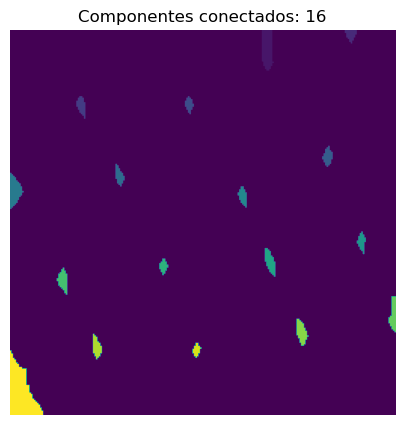

In [38]:
connected_components = label(erosion_img, background=0, connectivity=2)

unique_values = np.unique(connected_components)  # Obtiene los valores únicos
num_unique = len(unique_values) - 2  # Resta 2 para no contar el fondo y el objeto 

fig, ax = plt.subplots(figsize=(10, 5))
ax.imshow(connected_components)
ax.set_title(f'Componentes conectados: {num_unique}')
ax.axis('off')
plt.show()

Habrian 18 celulas segun los elementos conectados que pudieron ser encontrados en la imagen. En los que está el fondo y el borde. Lo que seria 16 celulas encontradas

**¿Qué ocurrio conel borde?**


El borde, al ser originalmente oscuro, quedó incluido en la segmentación tras la umbralización. Luego de las erosiones con las máscaras oblicuas, el fondo oscuro no se eliminó por completo y fue identificado como un componente conexo adicional, afectando el conteo total de células.

Esto sucede porque la erosión reduce el tamaño de los objetos, separando las células, pero no elimina regiones grandes de fondo que ya estaban conectadas en la imagen umbralizada. Como resultado, el borde oscuro se mantiene y se etiqueta como una región separada, alterando el número real de células detectadas.